<a href="https://colab.research.google.com/github/jihyoung-lee/Leaves/blob/main/Leaves_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile

#local_zip = 'data.zip'

#zip_ref = zipfile.ZipFile(local_zip, 'r')

#zip_ref.extractall('/tmp')
#zip_ref.close()

# 기본경로
base_dir = '/data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')

# 훈련에 사용되는  이미지 경로 예시
train_apple_dir = os.path.join(train_dir, '사과_정상')
train_black_dir = os.path.join(train_dir, '사과_검은별무늬병')
print(train_apple_dir)
print(train_black_dir)

# 테스트에 사용되는 이미지 경로 예시
validation_apple_dir = os.path.join(validation_dir, '사과_정상')
validation_black_dir = os.path.join(validation_dir, '사과_검은별무늬병')
print(validation_apple_dir)
print(validation_black_dir)

/data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)\train\사과_정상
/data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)\train\사과_검은별무늬병
/data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)\valid\사과_정상
/data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)\valid\사과_검은별무늬병


In [2]:
#각각 다섯 개씩 출력
train_apple_fnames = os.listdir( train_apple_dir )
train_black_fnames = os.listdir( train_black_dir )

print(train_apple_fnames[:5])
print(train_black_fnames[:5])

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: '/data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)\\train\\사과_정상'

In [3]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_apple_pix = [os.path.join(train_apple_dir, fname)
                for fname in train_apple_fnames[ pic_index-8:pic_index]]

next_black_pix = [os.path.join(train_black_dir, fname)
                for fname in train_black_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_apple_pix+next_black_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

NameError: name 'train_apple_fnames' is not defined

<Figure size 864x864 with 0 Axes>

In [4]:
from keras.preprocessing.image import ImageDataGenerator
#이미지 전처리

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, 
                                  zoom_range=0.2, width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_set = train_datagen.flow_from_directory(base_dir+'/train', target_size=(224, 224),
                                             batch_size = 32, class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(base_dir+'/valid', target_size=(224,224),
                                             batch_size=32, class_mode='categorical')

Found 121373 images belonging to 33 classes.
Found 30462 images belonging to 33 classes.


In [8]:
class_dict = train_set.class_indices
print(class_dict)
li = list(class_dict.keys())

print(len(li))


{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Cherry_(including_sour)___Powdery_mildew': 4, 'Cherry_(including_sour)___healthy': 5, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 6, 'Corn_(maize)___Common_rust_': 7, 'Corn_(maize)___Northern_Leaf_Blight': 8, 'Corn_(maize)___healthy': 9, 'Grape___Black_rot': 10, 'Grape___Esca_(Black_Measles)': 11, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 12, 'Grape___healthy': 13, 'Peach___Bacterial_spot': 14, 'Peach___healthy': 15, 'Pepper,_bell___Bacterial_spot': 16, 'Pepper,_bell___healthy': 17, 'Potato___Early_blight': 18, 'Potato___Late_blight': 19, 'Potato___healthy': 20, 'Strawberry___Leaf_scorch': 21, 'Strawberry___healthy': 22, 'Tomato___Bacterial_spot': 23, 'Tomato___Early_blight': 24, 'Tomato___Late_blight': 25, 'Tomato___Leaf_Mold': 26, 'Tomato___Septoria_leaf_spot': 27, 'Tomato___Spider_mites Two-spotted_spider_mite': 28, 'Tomato___Target_Spot': 29, 'Tomato___Tomato_Yellow

Mobile net

In [17]:
import tensorflow as tf
from tensorflow import keras
base_model = keras.applications.MobileNet(weights='imagenet', input_shape=(224,224,3),
                                         include_top=False)

In [18]:
base_model.trainable = False

inputs = keras.Input(shape=(224,224,3))

x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(33)(x)

mobilenet_model = keras.Model(inputs, outputs, name='pretrained_mobilenet')
mobilenet_model.summary()

Model: "pretrained_mobilenet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 33)                33825     
Total params: 3,262,689
Trainable params: 33,825
Non-trainable params: 3,228,864
_________________________________________________________________


In [19]:
mobilenet_model.compile(optimizer=keras.optimizers.Adam(),
                       loss=keras.losses.CategoricalCrossentropy(from_logits=True),
                       metrics=['accuracy'])
epochs = 20

In [20]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 모델의 가중치를 저장하는 콜백 만들기
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)



In [21]:
mobilenet_history = mobilenet_model.fit( train_set, steps_per_epoch=150, validation_data=valid_set, epochs=epochs,  callbacks=[cp_callback],validation_steps=100)

Epoch 1/20
150/150 [==============================] - 155s 1s/step - loss: 1.8342 - accuracy: 0.4985 - val_loss: 0.7810 - val_accuracy: 0.7956

Epoch 00001: saving model to training_1\cp.ckpt
Epoch 2/20
150/150 [==============================] - 160s 1s/step - loss: 0.7535 - accuracy: 0.7869 - val_loss: 0.5116 - val_accuracy: 0.8572

Epoch 00002: saving model to training_1\cp.ckpt
Epoch 3/20
150/150 [==============================] - 152s 1s/step - loss: 0.5417 - accuracy: 0.8440 - val_loss: 0.3782 - val_accuracy: 0.8972

Epoch 00003: saving model to training_1\cp.ckpt
Epoch 4/20
150/150 [==============================] - 154s 1s/step - loss: 0.4457 - accuracy: 0.8629 - val_loss: 0.3439 - val_accuracy: 0.9006

Epoch 00004: saving model to training_1\cp.ckpt
Epoch 5/20
150/150 [==============================] - 150s 999ms/step - loss: 0.4056 - accuracy: 0.8806 - val_loss: 0.2864 - val_accuracy: 0.9137

Epoch 00005: saving model to training_1\cp.ckpt
Epoch 6/20
150/150 [=================

In [34]:
os.listdir(checkpoint_dir)

['checkpoint', 'cp.ckpt.data-00000-of-00001', 'cp.ckpt.index']

In [35]:
results = mobilenet_model.evaluate(valid_set)
print('val loss:', results[0])
print('val acc:', results[1])

 23/952 [..............................] - ETA: 4:56 - loss: 0.1554 - accuracy: 0.9429

KeyboardInterrupt: 

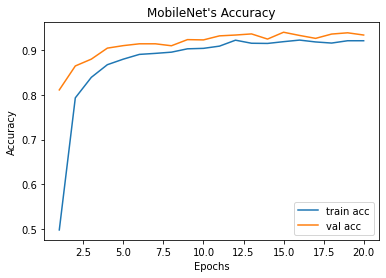

In [36]:
train_acc = mobilenet_history.history['accuracy']
val_acc = mobilenet_history.history['val_accuracy']

epochs_list = list(range(1, epochs + 1))

plt.plot(epochs_list, train_acc, label='train acc')
plt.plot(epochs_list, val_acc, label='val acc')
plt.title("MobileNet's Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')

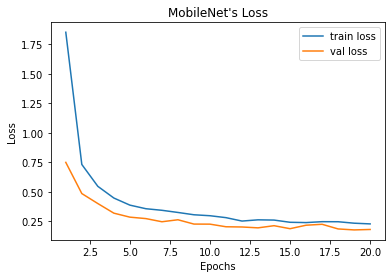

In [37]:
train_loss = mobilenet_history.history['loss']
val_loss = mobilenet_history.history['val_loss']

plt.plot(epochs_list, train_loss, label='train loss')
plt.plot(epochs_list, val_loss, label='val loss')
plt.title("MobileNet's Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

In [38]:
mobilenet_model.save('mobilenetnew.h5')

In [6]:
from keras.models import load_model
model = load_model('mobilenet.h5')

결과는?:
1/1 [==============================] - 0s 51ms/step
Apple___Cedar_apple_rust


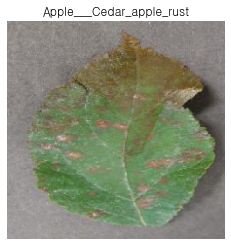

In [9]:
from keras.preprocessing import image
import numpy as np
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


image_path = "/tmp/test/test/AppleCedarRust4.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("결과는?:")

prediction = model.predict(img,verbose=1)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d): # 인덱스 추출하는 함수
    if item == j:
        class_name = li[index]
print(class_name)
        
#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()